## 한글이 도대체 어떻게 처리되길래 파이썬 2.x와 파이썬 3.x의 차이로 개고생을 하는 것인가? (쥬피터 노트북으로 정리를 하는게 좋은데 두 버전을 동시에 처리할 수가 없어 2.x 버전은 화면 덤프로 대신한다 ㅠㅠ 참고로 파이썬 2.x는 AWS의 ubuntu에서 실행하고 파이썬 3.x는 windows 10의 쥬피터 노트북에서 실행한다.)

#### 참고1 : 동양계가 아닌 경우는 유니코드에 약할 줄 알았는데 핵심을 잘 보여주네요.... (눈사람 문자가 많이 등장) http://wolfprojects.altervista.org/talks/unicode-and-python-3/

#### 참고2 : 파이썬 2.x에서 3.x 포팅시 참고(http://www.diveintopython3.net/porting-code-to-python-3-with-2to3.html)

### 파이썬의 버전 확인하기 (간혹 2.x와 3.x 버전을 모두 지원해야 할 수도 있으므로)

In [2]:
import sys

print(sys.version_info)
print(sys.version_info[0])
print('%x' % sys.hexversion)
print(sys.hexversion >= 0x03000000)

sys.version_info(major=3, minor=5, micro=2, releaselevel='final', serial=0)
3
30502f0
True


### 눈사람 코드값을 유니코드 문자로 변환하기 (파이썬 3.x에서는 unichr()이 없어졌음) : 눈사람 문자로 인해 공포의 UnicodeEncodeError가 발생하는 사람이 없기를

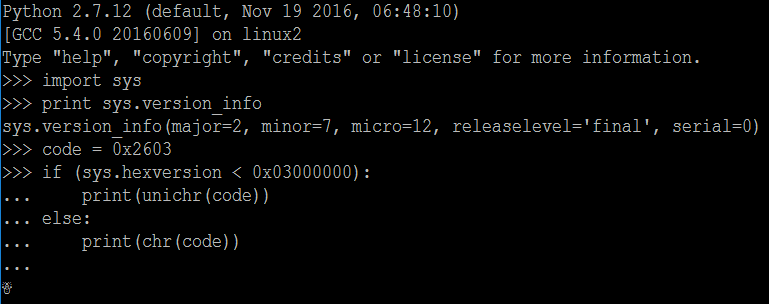

In [1]:
from IPython.display import Image
Image('image/python2_7_hangul_0.png')

In [15]:
code = 0x2603
if (sys.hexversion < 0x03000000):
    print(unichr(code))
else:
    print(chr(code))

☃


### 유니코드 문자 출력 테스트

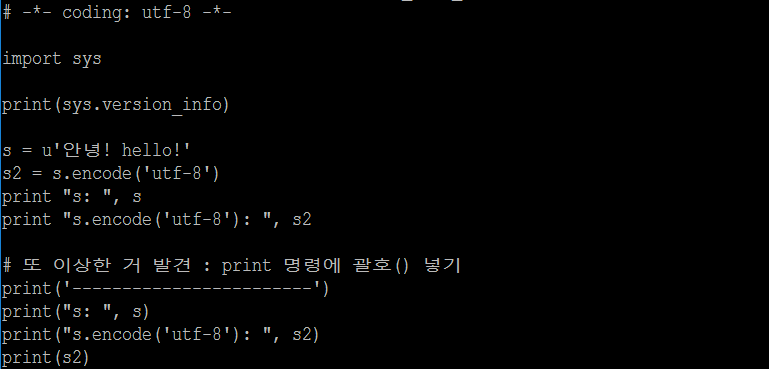

In [2]:
from IPython.display import Image
Image('image/python2_7_hangul_1.png')    # 소스

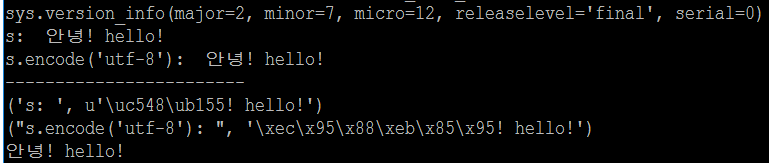

In [3]:
Image('image/python2_7_hangul_2.png')    # 실행 화면

### 파이썬 3.x에서의 실행 화면 (print 문에 괄호가 없는 에러 부분은 삭제했음)

In [23]:
s = u'안녕! hello!'
s2 = s.encode('utf-8')
# 또 이상한 거 발견 : print 명령에 괄호() 넣기
print('------------------------')
print("s: ", s)
print("s.encode('utf-8'): ", s2)
print(s2)

------------------------
s:  안녕! hello!
s.encode('utf-8'):  b'\xec\x95\x88\xeb\x85\x95! hello!'
b'\xec\x95\x88\xeb\x85\x95! hello!'


### p.s. : RNN 관련 소스를 돌려보다가 한글 정보를 가진 오브젝트를 저장/복원시 사용하는 cPickle(3.x에서는 pickle)이 윈도 버전에서 인코딩 관련 오류가 나와 구글신의 도움을 받았으나 실패중이고 한글 관련 이것저것 삽질만 하고 있네요 ㅠㅠ